In [3]:
import numpy as np
import hipopy as hhp
import hipopy.hipopy as hp
import matplotlib.pyplot as plt

In [4]:
for batch in hp.iterate(['/volatile/clas12/users/mfmce/mc_jobs_rga_vtx_2_12_24/skim_50nA_OB_job_3313_0.hipo'],banks=["MC::Lund", "REC::Particle"],step=10000):
    print(batch.keys())
    #batch.keys()
    dic = batch.keys()
    break
#batch['MC::Lund_lifetime'][1] 

dict_keys(['MC::Lund_index', 'MC::Lund_lifetime', 'MC::Lund_type', 'MC::Lund_pid', 'MC::Lund_parent', 'MC::Lund_daughter', 'MC::Lund_px', 'MC::Lund_py', 'MC::Lund_pz', 'MC::Lund_energy', 'MC::Lund_mass', 'MC::Lund_vx', 'MC::Lund_vy', 'MC::Lund_vz', 'REC::Particle_pid', 'REC::Particle_px', 'REC::Particle_py', 'REC::Particle_pz', 'REC::Particle_vx', 'REC::Particle_vy', 'REC::Particle_vz', 'REC::Particle_vt', 'REC::Particle_charge', 'REC::Particle_beta', 'REC::Particle_chi2pid', 'REC::Particle_status'])


In [10]:
len(batch['REC::Particle_px'][0])

7

In [5]:
protonm_x = []
protonm_y = []
protonm_z = []
pionm_x = []
pionm_y = []
pionm_z = [] 
for i in range(len(batch['REC::Particle_pid'])):
    for j in range(len(batch['REC::Particle_pid'][i])):
        if (int(batch['REC::Particle_pid'][i][j])==2212):
            jjj=j
            for kk in range(len(batch['REC::Particle_pid'][i])):
                if (int(batch['REC::Particle_pid'][i][kk])==211):
                    protonm_x += [batch['REC::Particle_px'][i][jjj]]
                    protonm_y.append(batch['REC::Particle_py'][i][jjj])
                    protonm_z += [batch['REC::Particle_pz'][i][jjj]]
                    pionm_x.append(batch['REC::Particle_px'][i][kk])
                    pionm_y.append(batch['REC::Particle_py'][i][kk])
                    pionm_z.append(batch['REC::Particle_pz'][i][kk])

In [8]:
batch['REC::Particle_px'][3][4]

0.271192729473114

In [9]:
protonm_r = np.zeros(len(protonm_x))
protonm_phi = np.zeros(len(protonm_x))
protonm_theta = np.zeros(len(protonm_x))

for i in range(len(protonm_x)):
    if (protonm_x[i]==0):
        protonm_x[i] = .001
    protonm_r[i] = protonm_x[i]**2+protonm_y[i]**2+protonm_z[i]**2
    #protonm_phi[i] = protonm_y[i]/protonm_x[i]
    protonm_theta[i] = protonm_z[i]/np.sqrt(protonm_x[i]**2+protonm_y[i]**2+protonm_z[i]**2)
protonm_r = np.sqrt(protonm_r)
protonm_phi = np.arctan2(protonm_y, protonm_x)
protonm_theta = np.arccos(protonm_theta)

pionm_r = np.zeros(len(pionm_x))
pionm_phi = np.zeros(len(pionm_x))
pionm_theta = np.zeros(len(pionm_x))

for i in range(len(pionm_x)):
    if (pionm_x[i]==0):
        pionm_x[i] = .001
    pionm_r[i] = pionm_x[i]**2+pionm_y[i]**2+pionm_z[i]**2
    #protonm_phi[i] = protonm_y[i]/protonm_x[i]
    pionm_theta[i] = pionm_z[i]/np.sqrt(pionm_x[i]**2+pionm_y[i]**2+pionm_z[i]**2)
pionm_r = np.sqrt(pionm_r)
pionm_phi = np.arctan2(pionm_y, pionm_x)
pionm_theta = np.arccos(pionm_theta)

Text(0.5, 0.92, 'Blue is proton, orange is Pion')

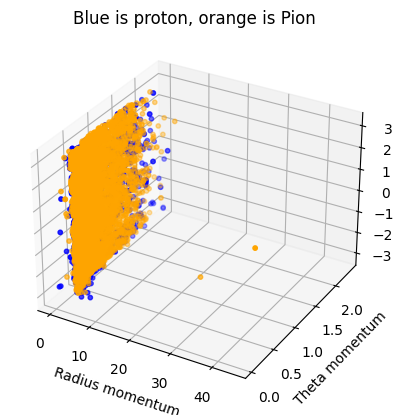

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(protonm_r, protonm_theta, protonm_phi,s=10, color = 'blue')
ax.scatter(pionm_r, pionm_theta, pionm_phi, s = 10, color = 'orange')
ax.set_xlabel('Radius momentum')
ax.set_ylabel('Theta momentum')
ax.set_zlabel('Phi momentum')
ax.set_title('Blue is proton, orange is Pion')

Text(0.5, 1.0, 'x, y MC momentum')

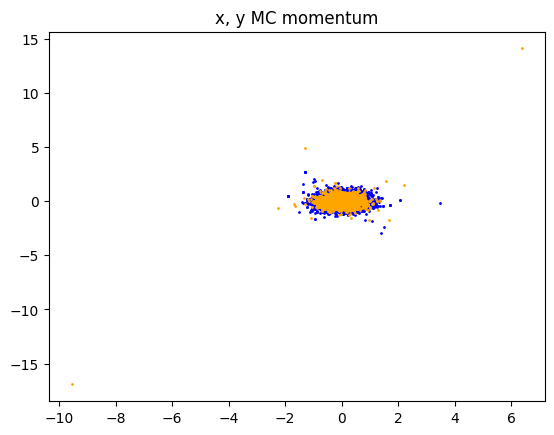

In [12]:
plt.scatter(protonm_x, protonm_y, s = 1, color = 'blue')
plt.scatter(pionm_x, pionm_y, s = 1, color = 'orange')
plt.title('x, y MC momentum')

Text(0.5, 1.0, 'z momentum REC')

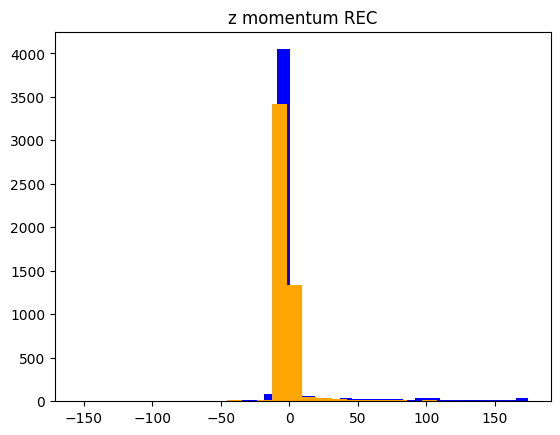

In [27]:
plt.hist(protonm_z, color = 'blue', bins = 30)
plt.hist(pionm_z, color = 'orange', bins = 30)
plt.title('z momentum REC')

Text(0.5, 0.92, 'Blue is proton, orange is Pion')

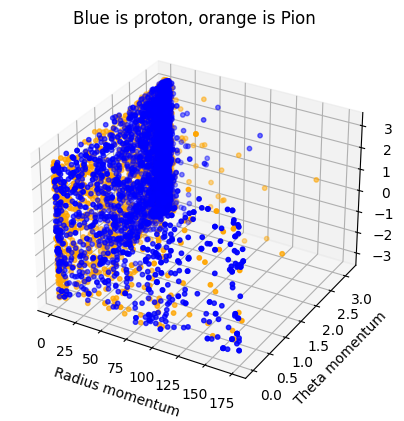

In [19]:
protonm_x = []
protonm_y = []
protonm_z = []
pionm_x = []
pionm_y = []
pionm_z = [] 
for i in range(len(batch['REC::Particle_pid'])):
    for j in range(len(batch['REC::Particle_pid'][i])):
        if (int(batch['REC::Particle_pid'][i][j])==2212):
            jjj=j
            for kk in range(len(batch['REC::Particle_pid'][i])):
                if (int(batch['REC::Particle_pid'][i][kk])==211):
                    protonm_x += [batch['REC::Particle_vx'][i][jjj]]
                    protonm_y.append(batch['REC::Particle_vy'][i][jjj])
                    protonm_z += [batch['REC::Particle_vz'][i][jjj]]
                    pionm_x.append(batch['REC::Particle_vx'][i][kk])
                    pionm_y.append(batch['REC::Particle_vy'][i][kk])
                    pionm_z.append(batch['REC::Particle_vz'][i][kk])
protonm_r = np.zeros(len(protonm_x))
protonm_phi = np.zeros(len(protonm_x))
protonm_theta = np.zeros(len(protonm_x))

for i in range(len(protonm_x)):
    if (protonm_x[i]==0):
        protonm_x[i] = .001
    protonm_r[i] = protonm_x[i]**2+protonm_y[i]**2+protonm_z[i]**2
    #protonm_phi[i] = protonm_y[i]/protonm_x[i]
    protonm_theta[i] = protonm_z[i]/np.sqrt(protonm_x[i]**2+protonm_y[i]**2+protonm_z[i]**2)
protonm_r = np.sqrt(protonm_r)
protonm_phi = np.arctan2(protonm_y, protonm_x)
protonm_theta = np.arccos(protonm_theta)

pionm_r = np.zeros(len(pionm_x))
pionm_phi = np.zeros(len(pionm_x))
pionm_theta = np.zeros(len(pionm_x))

for i in range(len(pionm_x)):
    if (pionm_x[i]==0):
        pionm_x[i] = .001
    pionm_r[i] = pionm_x[i]**2+pionm_y[i]**2+pionm_z[i]**2
    #protonm_phi[i] = protonm_y[i]/protonm_x[i]
    pionm_theta[i] = pionm_z[i]/np.sqrt(pionm_x[i]**2+pionm_y[i]**2+pionm_z[i]**2)
pionm_r = np.sqrt(pionm_r)
pionm_phi = np.arctan2(pionm_y, pionm_x)
pionm_theta = np.arccos(pionm_theta)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(protonm_r, protonm_theta, protonm_phi,s=10, color = 'blue')
ax.scatter(pionm_r, pionm_theta, pionm_phi, s = 10, color = 'orange')
ax.set_xlabel('Radius momentum')
ax.set_ylabel('Theta momentum')
ax.set_zlabel('Phi momentum')
ax.set_title('Blue is proton, orange is Pion')

Text(0.5, 1.0, 'r, theta MC vertex')

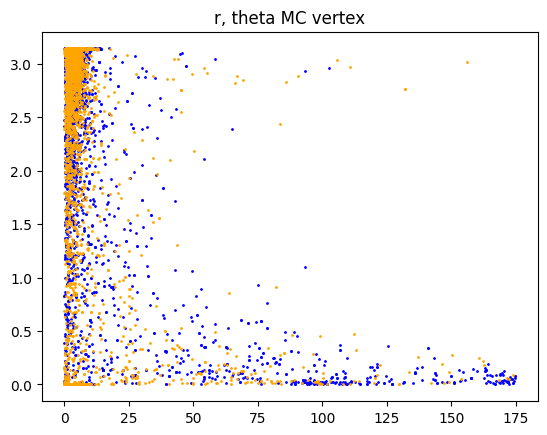

In [22]:
plt.scatter(protonm_r, protonm_theta, s = 1, color = 'blue')
plt.scatter(pionm_r, pionm_theta, s = 1, color = 'orange')
plt.title('r, theta MC vertex')